# National Hockey League Analytics: A study on Alex Ovechkin

#### Brian Lee

![ovi_skate.jpg](ovi_skate.jpg)

When defining a "generationally talented" player in The National Hockey League, only an exceptional few players can truly meet the criteria: players that essentially reinvent the game of hockey with their strength, skills, and smarts. Looking through previous generations of hockey, longtime fans and analysts alike would point to the likes of Bobby Orr, Patrick Roy, Pavel Datsyuk, Jaromir Jagr, and most famously Wayne Gretzky, who currently holds 61 National Hockey League records.

Current generational talents, whose careers are still in progress, are difficult to identify. These exceptional players are so revered that even fans of rival teams often hold them in respect and reverence. Among them are Sidney Crosby of the Pittsburgh Penguins, Connor McDavid of the Edmonton Oilers, and my personal favorite, Alex Ovechkin of the Washington Capitals. Alex Ovechkin, who was drafted by the Capitals in 2005, quickly caught the public eye with his high-energy and high-skill gameplay. Capable of hitting as hard as he shot, he stands as a founder of the archetype of the modern hockey player.

![ovi_2017.jpg](ovi_2017.jpg)

However, that is not to say Alex Ovechkin's all-time greatness was not questioned. Despite leading efforts in all but a few postseasons, Ovechkin experienced nothing but crushing defeats in the playoffs, never breaking through past the second of four rounds it takes to win the Stanley Cup. The disappointment was at its peak after an early exit from the 2017 playoffs, during which he was surrounded by arguably his most talented team yet. Although he went onto achieve the greatest feat in hockey, winning a Stanley Cup chapmionship with 16 goals and 8 assists, the discourse was still there and it was loud.
Many not only blamed his lack of success on his laziness and selfishness, but also blamed his style of play, which involves shooting the puck and his utilizing his goal-scoring ability. 

Through an exploration of real game data, I wish to dispel notion that he is nothing short of a generationally talented player. My objectives are to demonstrate just how unparalleled his ability to score goals is to any other player in the league and analyze the strength of this unique contribution to the Washington Capitals. My future goals would be to construct a model that, given data about his goals scored, can accurately classify whether an Alex Ovechkin shot would result in a goal.

![ovi_2018.jpg](ovi_2018.jpg)



In [3]:
# Install a pip package in the current Jupyter kernel if not yet installed locally.
import sys
!python -m pip install hockey_rink

# Install other Python packages.
import requests as req
import json
import numpy as np
import math
from hockey_rink import NHLRink
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from PIL import Image
import matplotlib.lines as mlines
from matplotlib.patches import RegularPolygon
from PIL import Image
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

## Data Preparation

Although the Python script to write raw game data into JSON file format already finds NHL games of a specific team and a specific year, each game data file still has megabytes worth of metadata that must be overlooked before storing into Python data structures. This fluff includes the real-world times of the events, changes in posession, and the names of players involved. None of this is necessary to our analysis.

The game events we do need to keep track of are shots on goal. In hockey, a shot on goal includes shots, which are attempts that hit the goalie for a save, as well as those that hit the net; attempts that miss the net or hit the goalposts are not included. Therefore, this script should only include events that are labeled as "SHOT" and "GOAL." 

In [75]:
#Initialize dictionary, variables
games18 = 82 #82 games per season
id = 8471214 #Alex Ovechkin NHLID

leaguewide_stats = {}
leaguewide_stats['Shot'] = {}
leaguewide_stats['Shot']['x'] = []
leaguewide_stats['Shot']['y'] = []
leaguewide_stats['Shot']['time'] = []
leaguewide_stats['Shot']['shottype'] = []
leaguewide_stats['Goal'] = {}
leaguewide_stats['Goal']['x'] = []
leaguewide_stats['Goal']['y'] = []
leaguewide_stats['Goal']['time'] = []
leaguewide_stats['Goal']['shottype'] = []

player_stats = {}
player_stats['Shot'] = {}
player_stats['Shot']['x'] = []
player_stats['Shot']['y'] = []
player_stats['Shot']['time'] = []
player_stats['Shot']['shottype'] = []
player_stats['Goal'] = {}
player_stats['Goal']['x'] = []
player_stats['Goal']['y'] = []
player_stats['Goal']['time'] = []
player_stats['Goal']['shottype'] = []

#Master function of sorts that stores every play of every game for a player
# in a given year.
def store_year(year, until, searchid):
    end_year = int(year) + 1
    print("Appending data for year " + year + "-" + str(end_year)+ "...")

    for i in range(1, until):
        with open('./'+year+'Data'+'/'+
            year+'_g'+str(i)+'Capitals.json') as file:
            game = json.load(file)
            all_plays = game['liveData']['plays']['allPlays']
            #print(game['gamePk']) #For debugging purposes
            fill_dict(all_plays, searchid)

#Fills the dictionary with all the right plays
def fill_dict(all_plays, searchid):
    for play in all_plays:
        if 'players' in play:
            j = 0

            #Differentiates if a the desired player is part of the play.
            player_list = play['players']
            for player in player_list:
                matchid = player_list[0]['player']['id']
                if searchid == matchid:
                    player_dict = player_stats
                    sort_event(play, player_dict)
                else:
                    player_dict = leaguewide_stats
                    sort_event(play, player_dict)
                j += 1

#Categorizes events based on type, i.e, shot, goal, etc.
def sort_event(play, dict):
    #Initialize for compactness purposes
    xs = dict['Shot']['x']
    ys = dict['Shot']['y']
    ts = dict['Shot']['time']
    sts = dict['Shot']['shottype']
    xg = dict['Goal']['x']
    yg = dict['Goal']['y']
    tg = dict['Goal']['time']
    stg = dict['Goal']['shottype']

    event = play["result"]['event'] #The name of type of event
    coordinates = play['coordinates'] #Necessary for special cases of
    #bad data where only one coordinate exists for the event

    if len(coordinates) == 2:            
        if (event == "Shot" or event == "Goal") and ('secondaryType' in play['result']):
            shottype = play['result']['secondaryType']                     
            if event == "Shot":
                #print(play['about']['eventIdx'])
                xcoord = play['coordinates']['x']
                ycoord = play['coordinates']['y']
                time = play['about']['periodTime']
                xs.append(xcoord)
                ys.append(ycoord)
                ts.append(time)
                sts.append(shottype)
            elif event == "Goal":
                xcoord = play['coordinates']['x']
                ycoord = play['coordinates']['y']
                time = play['about']['periodTime']
                xg.append(xcoord)
                yg.append(ycoord)
                tg.append(time)
                stg.append(shottype)



store_year('2010', 82, id)
store_year('2011', 82, id)
store_year('2012', 48, id)
store_year('2013', 82, id)
store_year('2014', 82, id)
store_year('2015', 82, id)
store_year('2016', 82, id)
store_year('2017', 82, id)
store_year('2018', 82, id)
store_year('2019', 82, id)
store_year('2020', 56, id)
#print(player_stats['Goal']['shottype'])


Appending data for year 2010-2011...
Appending data for year 2011-2012...
Appending data for year 2012-2013...
Appending data for year 2013-2014...
Appending data for year 2014-2015...
Appending data for year 2015-2016...
Appending data for year 2016-2017...
Appending data for year 2017-2018...
Appending data for year 2018-2019...
Appending data for year 2019-2020...
Appending data for year 2020-2021...


To further simplify our navigation of the shot data, we can use the Python package Pandas to read the dictionaries into dataframes, which have helpful access and manipulation features.

In [80]:
#Initialize dataframes to use pandas data analysis
player_df = pd.DataFrame(player_stats)
league_df = pd.DataFrame(leaguewide_stats)

league_sog_x = league_df['Shot']['x'] + league_df['Goal']['x']
league_sog_y = league_df['Shot']['y'] + league_df['Goal']['y']
league_sog_t = league_df['Shot']['time'] + league_df['Goal']['time']
league_sog_st = league_df['Shot']['shottype'] + league_df['Goal']['shottype']
player_sog_x = player_df['Shot']['x'] + player_df['Goal']['x']
player_sog_y = player_df['Shot']['y'] + player_df['Goal']['y']
player_sog_t = player_df['Shot']['time'] + player_df['Goal']['time']
player_sog_st = player_df['Shot']['shottype'] + player_df['Goal']['shottype']

#Assumed that goals are added to where shots end. Create list to classify events.
def goalcheck(type_df):
    test = list()
    for i in range(len(type_df['Shot']['x'])):
        test.append(0)
    for i in range(len(type_df['Shot']['x']),
            len(type_df['Shot']['x'] + type_df['Goal']['x'])):
        test.append(1)
    return test
league_goalcheck = goalcheck(league_df)
player_goalcheck = goalcheck(player_df)
league_goalcheck = np.array(league_goalcheck)
player_goalcheck = np.array(player_goalcheck)

def converttime(time_list):
    test = list()
    for i in range(len(time_list)):
        time_split = time_list[i].split(':')
        test.append(60 * int(time_split[0]) + int(time_split[1]))    
    return test

player_sog_t = converttime(player_sog_t)
league_sog_t = converttime(league_sog_t)

#Make new dataframes with a check if the shot is a goal or not
#League
league_sog_x = np.array(league_sog_x)
np.abs(league_sog_x, out=league_sog_x) #Normalize coordinates
league_sog_y = np.array(league_sog_y) #No normalization needed for y
league_g_x = np.abs(np.array(league_df['Goal']['x']))
league_g_y = np.array(league_df['Goal']['y'])

league_sog_df = pd.DataFrame()
league_sog_df['x'] = league_sog_x
league_sog_df['y'] = league_sog_y
league_sog_df['time'] = league_sog_t
league_sog_df['shottype'] = league_sog_st
league_sog_df['goalcheck'] = league_goalcheck

#Player
player_sog_x = np.array(player_sog_x)
np.abs(player_sog_x, out=player_sog_x)
player_sog_y = np.array(player_sog_y)
player_g_x = np.abs(np.array(player_df['Goal']['x']))
player_g_y = np.array(player_df['Goal']['y'])

player_sog_df = pd.DataFrame()
player_sog_df['x'] = player_sog_x
player_sog_df['y'] = player_sog_y
player_sog_df['time'] = player_sog_t
player_sog_df['shottype'] = player_sog_st
player_sog_df['goalcheck'] = player_goalcheck

#Find comparative sizes of data for scaling purposes.
comp_size = len(league_sog_x)/len(player_sog_x)

## Exploratory Data Analysis

Now that we have our shot on goal data stored in easily accessible Pandas dataframes, the first approach to analyzing the data would be to perform exploratory data analysis, or EDA. The purpose of exploratory data analysis is to conduct preliminary examinations on the data for any trends or outliers before any feature engineering or data manipulation.

We can first conduct a data description to gain our bearings.

In [81]:
## Stat analysis
display(league_sog_df)
display(player_sog_df)

,x,y,time,shottype,goalcheck
0,40.0,-24.0,78,Slap Shot,0
1,40.0,-24.0,78,Slap Shot,0
2,34.0,22.0,119,Snap Shot,0
3,34.0,22.0,119,Snap Shot,0
4,81.0,-7.0,153,Backhand,0
...,...,...,...,...,...
99294,79.0,0.0,1131,Tip-In,1
99295,79.0,0.0,1131,Tip-In,1
99296,23.0,-39.0,1169,Backhand,1
99297,23.0,-39.0,1169,Backhand,1


,x,y,time,shottype,goalcheck
0,30.0,-24.0,995,Snap Shot,0
1,30.0,-24.0,995,Snap Shot,0
2,62.0,13.0,338,Snap Shot,0
3,62.0,13.0,338,Snap Shot,0
4,60.0,15.0,899,Wrist Shot,0
...,...,...,...,...,...
7938,56.0,-13.0,375,Slap Shot,1
7939,77.0,-11.0,911,Wrist Shot,1
7940,77.0,-11.0,911,Wrist Shot,1
7941,77.0,-11.0,911,Wrist Shot,1


Explanation

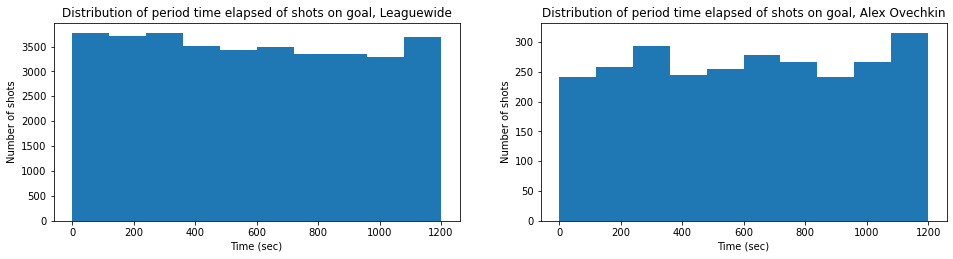

In [29]:
fig = plt.figure(figsize=(16,8))
ax = []
ax.append(fig.add_subplot(221))
ax.append(fig.add_subplot(222))


ax[0].hist(league_sog_df['time'])
ax[0].title.set_text("Distribution of period time elapsed of shots on goal, Leaguewide")
ax[0].set_xlabel("Time (sec)")
ax[0].set_ylabel("Number of shots")

ax[1].hist(player_sog_df['time'])
ax[1].title.set_text("Distribution of period time elapsed of shots on goal, Alex Ovechkin")
ax[1].set_xlabel("Time (sec)")
ax[1].set_ylabel("Number of shots")

plt.show()


Hockey is very much a high intensity, short duration sport, with an average shift lasting only about 50-70 seconds. Therefore, fatigue is indeed a significant factor coaches consider when partitioning ice time to their players according to skill level.

Based on these histograms, assuming his playtime across the period is somewhat uniform, Alex Ovechkin appears to increase in shot productivity towards the end of the period as well as towards the end of the first quarter of a given period. This means that although Ovechkin is considerably productive at any time of the period, coaches are correct to play Ovechkin towards the end of the period, where he can secure goals before the end of the period as a clutch player or generally apply pressure to the oppositoni's defense at a time when they are already tired. A further study can examine how various coaches managed his ice time and that effect on Ovechkin's shot productivity.

Because this scenario exists in three-dimensional space, it is more helpful to visualize the event coordinates for shots and goals as locations on the rink's surface. This is allows us to more finely discern the shape of these shots on more than one axis at once. It would also be helpful to visualize a version of the plot whose values are determiend by whether a shot resulted in a goal or not. 

Luckily, the efforts of GitHub user @the-bucketless have provided an incredibly intuitive package that allows us to draw many types of hockey rinks onto a Matplotlib figure. In addition, there are plotting functions that extend those of Matplotlib to create intresting and presentable visualizations on the rink surface, such as contour plots and heatmaps.

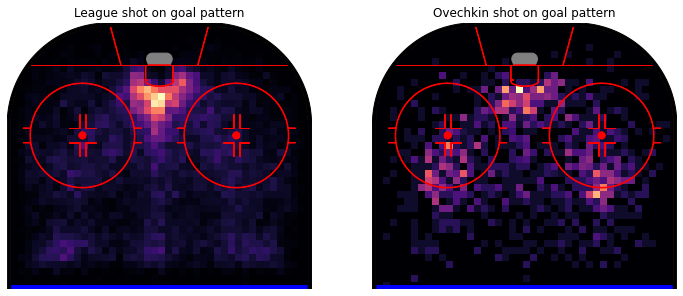

In [8]:
#First figure, for raw shot-goal pattern visualization.
fig = plt.figure(figsize=(12, 8))
ax = []
ax.append(fig.add_subplot(121))
ax.append(fig.add_subplot(122))
#ax.append(fig.add_subplot(223))
#ax.append(fig.add_subplot(224))

ax[0].title.set_text("League shot on goal pattern")
#ax[1].title.set_text("League shot on goal pattern, leveled by goals scored")
ax[1].title.set_text("Ovechkin shot on goal pattern")
#ax[3].title.set_text("Ovechkin shot on goal pattern, leveled by goals scored")
#NOTE: Uncomment and modify indices for more countour/heatmap plots.

rink = NHLRink(rotation=90)
for i in range(2):
    rink.draw(ax=ax[i], display_range="ozone")

#Visualize raw shot-goal patterns
#rink.heatmap(league_sog_df.x, league_sog_df.y,
     #cmap="magma", ax=ax[0], binsize=2)
#rink.heatmap(player_sog_df.x, player_sog_df.y,
    #cmap="magma", ax=ax[1], binsize=2)
rink.heatmap(league_sog_df.x, league_sog_df.y,
     cmap="magma", ax=ax[0], binsize=2)
rink.heatmap(player_sog_df.x, player_sog_df.y,
    cmap="magma", ax=ax[1], binsize=2) 
#NOTE: Change order of function calls if heat maps vs. contour plots desired.

#rink.contourf(league_sog_df.x, league_sog_df.y,
    #ax=ax[0], binsize=20, cmap="bwr", levels=100)
#rink.contourf(player_sog_df.x, player_sog_df.y,
    #ax=ax[1], binsize=20, cmap="bwr", levels=100)
#rink.contourf(league_sog_df.x, league_sog_df.y,
    #values=league_sog_df.goalcheck, ax=ax[1], binsize=20, cmap="bwr", levels=100)
#rink.contourf(player_sog_df.x, player_sog_df.y,
    #values=player_sog_df.goalcheck, ax=ax[3], binsize=20, cmap="bwr", levels=100)


There are some surface-level take-aways we can gain from these simple contour plots. Examining the first two plots, we observe that, across the league, the shots taken are heavily concentrated in front of the net, no more than a meter or two away. This same tendency applies when we measure the levels based on if a goal was scored or not. We can see that goal-scoring success actually strengthens based on the contrast between the "warmer" and "colder" contour patterns.

However, Alex Ovechkin's shot and goal pattern is quite different. Not only does he take more shots from more areas on the ice, such as on the tops of the faceoff circles, but also the goals he scores tend more towards the left circle in particular. It should be noted that conventional hockey education teaches players to shoot close in front of the net for the highest probability. So in a sense, Alex Ovechkin is already defying certain odds with how he is able to score from a wide range of locations, a sharpshooter.

However, Alex Ovechkin's shot and goal pattern is quite different. He a fair number of shots close to the net like the rest of the league, but

We can further explore Alex Ovechkin's unconventional shooting pattern by comparing his performance relative to that of the rest of the league.

## Results

In [9]:
#Initialize project-specific measurements for figures.
bounds = [-100.0, 100.0, -100, 100]
grid = 30
cnt = 0

color_map = plt.cm.winter
positive_cm = ListedColormap([mcolors.ColorConverter().to_rgb('#e1e5e5'),
    mcolors.ColorConverter().to_rgb('#d63b36')])
negative_cm = ListedColormap([mcolors.ColorConverter().to_rgb('#e1e5e5'),
    mcolors.ColorConverter().to_rgb('#28aee4')])

width = 50
height= 50
shiftx = 28
shifty= 25
scalex = width/100*1.25
scaley = height/100*1.8
scalehex = 4.4*scalex

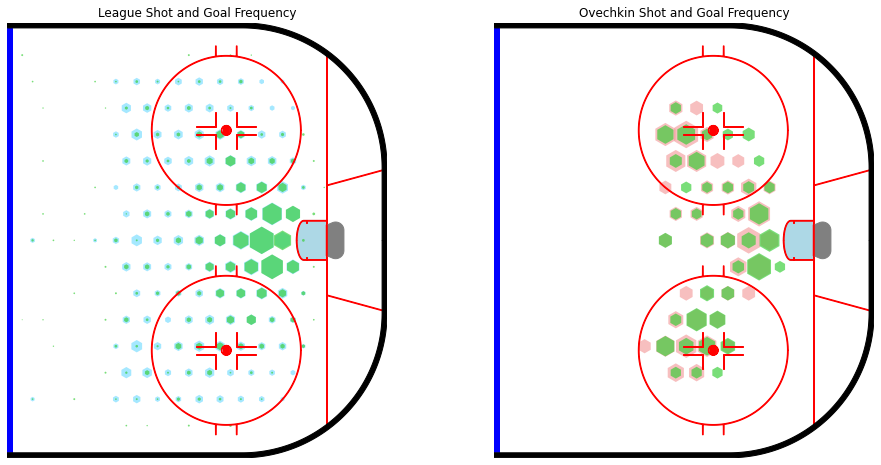

In [10]:
fig = plt.figure(figsize=(16, 8)) #Save each figure for future analysis
ax = []

##############################################################
ax_league = fig.add_subplot(121)
ax_league.title.set_text("League Shot and Goal Frequency")
ax.append(ax_league)

rink = NHLRink()
rink_league = rink.draw(ax=ax[0],display_range="ozone")

league_sog_hex = plt.hexbin(league_sog_x, league_sog_y,
    gridsize=grid, extent=bounds, mincnt=cnt, alpha=0)
league_g_hex = plt.hexbin(league_g_x, league_g_y,
    gridsize=grid, extent=bounds, mincnt=cnt, alpha=0)

league_offsets = league_sog_hex.get_offsets()
league_sog_freq = league_sog_hex.get_array()
league_g_offsets = league_g_hex.get_offsets()
league_g_freq = league_g_hex.get_array()

for i,j in enumerate(league_offsets):
    if league_sog_freq[i] < 50: continue
    league_sog_scale = league_sog_freq[i]/max(league_sog_freq)
    radius = scalehex * math.sqrt(league_sog_scale)

    hex = RegularPolygon((shiftx+j[0]*scalex, (height/2)-j[1]*scaley-shifty), numVertices=6,
        radius=radius, orientation=np.radians(0), alpha=0.35, facecolor="deepskyblue")
    rink_league.add_patch(hex)
    
for i,j in enumerate(league_g_offsets):
    if league_sog_freq[i] < 10: continue
    league_g_scale = league_g_freq[i]/max(league_g_freq)
    radius = scalehex * math.sqrt(league_g_scale)

    hex = RegularPolygon((shiftx+j[0]*scalex, (height/2)-j[1]*scaley-shifty), numVertices=6,
        radius=radius, orientation=np.radians(0), alpha=0.65, facecolor="limegreen")
    rink_league.add_patch(hex)
    
#########################################################
ax_player = fig.add_subplot(122)
ax_player.title.set_text("Ovechkin Shot and Goal Frequency")
ax.append(ax_player)

rink = NHLRink()
rink_player = rink.draw(ax=ax[1],display_range="ozone")

player_sog_hex = plt.hexbin(player_sog_x, player_sog_y,
    gridsize=grid, extent=bounds, mincnt=cnt, alpha=0)
player_g_hex = plt.hexbin(player_g_x, player_g_y,
    gridsize=grid, extent=bounds, mincnt=cnt, alpha=0)

player_offsets = player_sog_hex.get_offsets()
player_sog_freq = player_sog_hex.get_array()
player_g_offsets = player_g_hex.get_offsets()
player_g_freq = player_g_hex.get_array()

#Visualize where player takes shots
for i,j in enumerate(player_offsets):
    if player_sog_freq[i] < 25: continue
    player_sog_scale = player_sog_freq[i]/max(player_sog_freq)
    radius = scalehex * math.sqrt(player_sog_scale)

    hex = RegularPolygon((shiftx+j[0]*scalex, (height/2)-j[1]*scaley-shifty), numVertices=6,
        radius=radius, orientation=np.radians(0), alpha=0.5, facecolor="lightcoral")
    rink_player.add_patch(hex)

#Visualize where player scores
for i, j in enumerate(player_g_offsets):
    if player_g_freq[i] < 5: continue
    player_g_scale = player_g_freq[i]/max(player_g_freq)
    radius2 = scalehex * math.sqrt(player_g_scale)

    hex2 = RegularPolygon((shiftx+j[0]*scalex, (height/2)-j[1]*scaley-shifty), numVertices=6,
        radius=radius2, orientation=np.radians(0), alpha=0.65, facecolor="limegreen")
    rink_player.add_patch(hex2)

Explanation

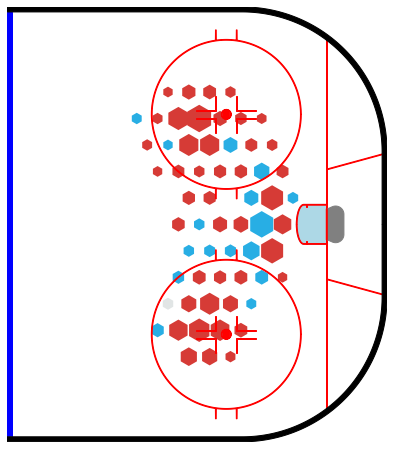

In [11]:
#Compare scoring efficiency of player against league.
league_eff = list()
player_eff = list()
comp_eff = list()

fig_comp, ax_comp = plt.subplots(1, 1, figsize=(8, 8)) #Save each figure for future analysis
rink = NHLRink()
rink_comp = rink.draw(display_range="ozone")

#May not be necessary for final product.
for i in range(0, len(league_sog_freq)):
    if league_sog_freq[i] < 5 or player_sog_freq[i] < 5: continue
    league_eff_local = league_g_freq[i]/league_sog_freq[i]
    player_eff_local = player_g_freq[i]/player_sog_freq[i]

    league_eff.append(league_eff_local)
    player_eff.append(player_eff_local)
    comp_eff.append(player_eff_local-league_eff_local)
    
for i, j in enumerate(player_offsets):
    if player_sog_freq[i] < 15: continue
    player_sog_scale = player_sog_freq[i]/max(player_sog_freq)
    radius3 = scalehex * math.sqrt(player_sog_scale)

    league_eff_local = league_g_freq[i]/league_sog_freq[i]
    player_eff_local = player_g_freq[i]/player_sog_freq[i]
    comp_eff_local = player_eff_local-league_eff_local

    if comp_eff_local > 0:
        colour = positive_cm(math.pow(comp_eff_local, 0.001))
    else:
        colour = negative_cm(math.pow(-comp_eff_local, 0.001))

    hex3 = RegularPolygon((shiftx+j[0]*scalex, (height/2)-j[1]*scaley-shifty), numVertices=6,
        radius=radius3, orientation=np.radians(0), alpha=1.0, facecolor=colour)

    rink_comp.add_patch(hex3)

![ovi_ppgspot.jpg](ovi_2010.jpg)

Explanation

In [12]:
plt.show()

## Model Building

In [13]:
## Code

## References
[1] NHL Analytics With Python: https://towardsdatascience.com/nhl-analytics-with-python-6390c5d3206d 

[2] hockey_rink Python package: https://github.com/the-bucketless/hockey_rink